## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [32]:
df=pd.read_csv("ufo_sightings.csv", index_col="#")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64683 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            64683 non-null  object 
 1   City                 64683 non-null  object 
 2   State/Province       59973 non-null  object 
 3   Country              56927 non-null  object 
 4   UFO_Shape            63124 non-null  object 
 5   Length_of_Encounter  64683 non-null  float64
 6   Described_Duration   64683 non-null  object 
 7   Description          64668 non-null  object 
 8   Date_Documented      64683 non-null  object 
 9   Latitude             64683 non-null  float64
 10  Longitude            64683 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.9+ MB


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [33]:
no_null_df = df.dropna()
no_null_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            53562 non-null  object 
 1   City                 53562 non-null  object 
 2   State/Province       53562 non-null  object 
 3   Country              53562 non-null  object 
 4   UFO_Shape            53562 non-null  object 
 5   Length_of_Encounter  53562 non-null  float64
 6   Described_Duration   53562 non-null  object 
 7   Description          53562 non-null  object 
 8   Date_Documented      53562 non-null  object 
 9   Latitude             53562 non-null  float64
 10  Longitude            53562 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.9+ MB


### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [34]:
filtered_df = no_null_df.drop(["Described_Duration", "Description", "Date_Documented"], axis=1)
filtered_df.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [35]:
filtered_df ["Date_Time"] = pd.to_datetime(filtered_df ["Date_Time"])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date_Time            53562 non-null  datetime64[ns]
 1   City                 53562 non-null  object        
 2   State/Province       53562 non-null  object        
 3   Country              53562 non-null  object        
 4   UFO_Shape            53562 non-null  object        
 5   Length_of_Encounter  53562 non-null  float64       
 6   Latitude             53562 non-null  float64       
 7   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.7+ MB


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

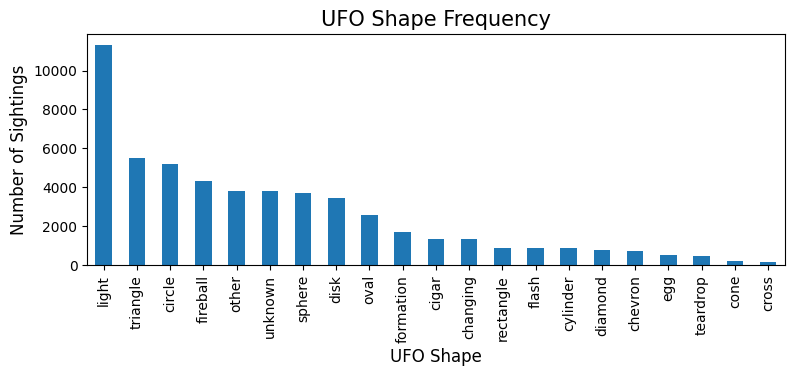

In [36]:
ufo_shape_frequency = filtered_df["UFO_Shape"].value_counts()
ufo_shape_frequency.plot.bar(figsize=(9,3));
plt.title("UFO Shape Frequency", fontsize = 15);
plt.xlabel("UFO Shape", fontsize = 12);
plt.ylabel("Number of Sightings", fontsize = 12);

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

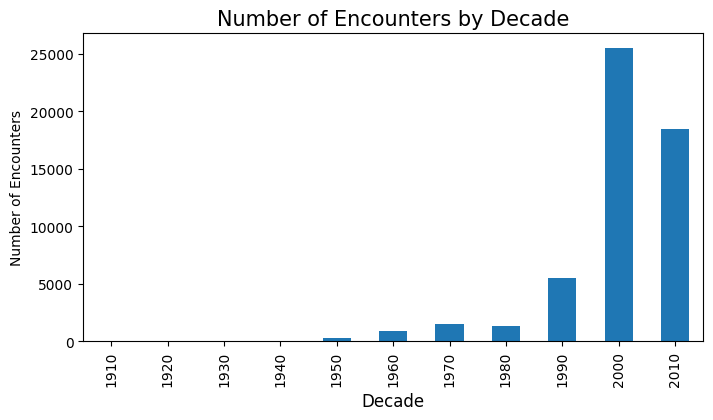

In [37]:
filtered_df["date_year"] = filtered_df["Date_Time"].dt.year
filtered_df["date_year"].value_counts().sort_index()
filtered_df["10_year_interval"] = (filtered_df["date_year"] // 10) * 10
filtered_df["10_year_interval"].value_counts().sort_index().plot.bar(figsize = (8,4));


plt.title("Number of Encounters by Decade", fontsize = 15);
plt.xlabel("Decade", fontsize = 12);
plt.ylabel("Number of Encounters");


### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

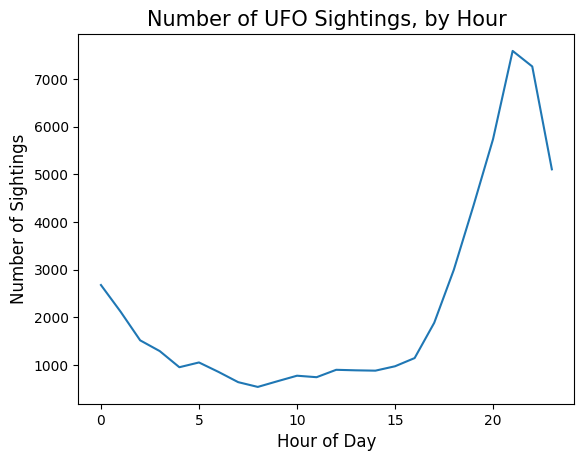

In [38]:
filtered_df["hour_of_day"] = filtered_df["Date_Time"].dt.hour;
filtered_df["hour_of_day"].value_counts().sort_index();
filtered_df["hour_of_day"].value_counts().sort_index().plot();

plt.title("Number of UFO Sightings, by Hour", fontsize = 15);
plt.xlabel("Hour of Day", fontsize = 12);
plt.ylabel("Number of Sightings", fontsize = 12);

### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Q1 Ball of light

2. Which shape is least frequently reported?
    * Q2 A cross

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * Q3 Later at night when it is getting dark arond 9:00 p.m.
4. Are there other factors that may account for this pattern in the data?
    * Q4 It is easier to see balls of light late at night
5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * Q5 They started right around the beginning of the cold war which stimulated an increase in aeronautical technology that could attribute to more unidentified objects being seen at night.

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * Q6 Go out late at night around 9:00 p.m. and look for balls of light


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

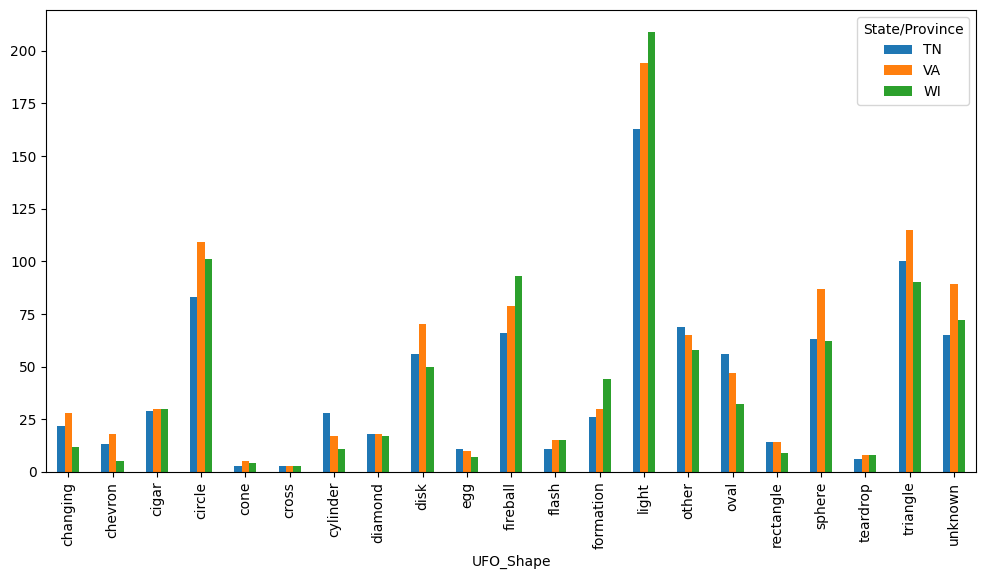

In [44]:
states = filtered_df[(filtered_df["State/Province"] == "VA") | (filtered_df["State/Province"] == "TN") | (filtered_df["State/Province"] == "WI")]

states.groupby(["UFO_Shape", "State/Province"]).size().unstack().plot.bar(figsize = (12,6));